# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/2_generated/2step_transformation_dt4h_GeminiFlash"
lang = "en"
main_path = os.path.join(main_path, lang)

# Data Exploration

## Amount of data

In [3]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [4]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r").read()

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [5]:
df.head()

,filename,text
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 44-year-...
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 66-year-...
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 15-year-...
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 60-year-...
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 86-year-...


In [6]:
df["text_orig"] = df["text"]
df["text"] = df["text_orig"].apply(lambda x: x.split("'text_to_transform': ")[-1][:-1].replace("'", ""))
df

,filename,text,text_orig
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 44-year-...,**Discharge Summary**\n\n**Patient:** 44-year-...
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 66-year-...,**Discharge Summary**\n\n**Patient:** 66-year-...
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 15-year-...,**Discharge Summary**\n\n**Patient:** 15-year-...
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 60-year-...,**Discharge Summary**\n\n**Patient:** 60-year-...
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 86-year-...,**Discharge Summary**\n\n**Patient:** 86-year-...
...,...,...,...
995,30762762_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 30-year-...,**Discharge Summary**\n\n**Patient:** 30-year-...
996,27980283_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 76-year-...,**Discharge Summary**\n\n**Patient:** 76-year-...
997,34012203_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 77-year-...,**Discharge Summary**\n\n**Patient:** 77-year-...
998,37828735_4_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 49-year-...,**Discharge Summary**\n\n**Patient:** 49-year-...


In [7]:
# Include the number of RoBERTa tokens
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

/gpfs/projects/bsc14/code/MultiSynDS/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [8]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].str.split(r"\n|\s").str.len()
df["n_tokens"] = df["text"].apply(lambda x: len(tokenizer(x)["input_ids"]))
df.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors


,filename,text,text_orig,n_char,n_words,n_tokens
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 44-year-...,**Discharge Summary**\n\n**Patient:** 44-year-...,2337,301,559
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 66-year-...,**Discharge Summary**\n\n**Patient:** 66-year-...,2611,346,653
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 15-year-...,**Discharge Summary**\n\n**Patient:** 15-year-...,3897,525,974
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 60-year-...,**Discharge Summary**\n\n**Patient:** 60-year-...,2394,330,643
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 86-year-...,**Discharge Summary**\n\n**Patient:** 86-year-...,3132,442,835


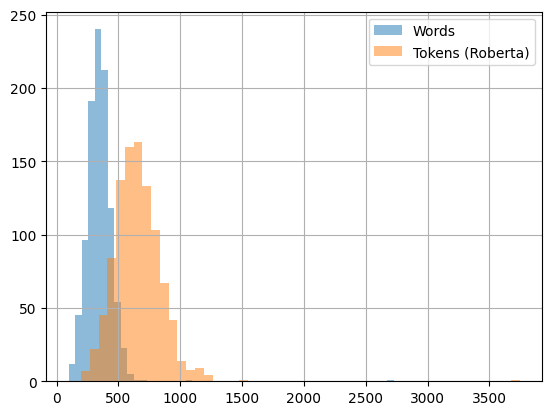

In [9]:
df["n_words"].hist(bins=50, alpha=0.5, label="Words");
df["n_tokens"].hist(bins=50, alpha=0.5, label="Tokens (Roberta)");
plt.legend();

In [10]:
df.describe()

,n_char,n_words,n_tokens
count,1000.000000,1000.000000,1000.000000
mean,2513.769000,345.369000,655.344000
std,657.103805,117.954797,201.801113
min,781.000000,97.000000,197.000000
25%,2085.750000,283.750000,530.750000
50%,2486.000000,342.000000,644.500000
75%,2897.250000,395.250000,763.250000
max,7119.000000,2724.000000,3743.000000


In [11]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

35089242_transformed_step1.txt
**Discharge Summary**

**Patient:** A 30-year-old Japanese woman

**Admission Date:** [Admission Date -  Not specified in the text]

**Discharge Date:** [Discharge Date - Not specified in the text, but approximately 2 months after admission based on the text]

**Reason for Admission:** Liver dysfunction, edematous gallbladder wall thickening, and fluid retention (as evidenced by abdominal CT).

**Medical History:**  No significant past medical or family history. Non-smoker, non-drinker.

**Physical Examination on Admission:** Height: 164.2 cm; Weight: 48.8 kg; Temperature: 36.0°C; Blood Pressure: 130/60 mmHg; Heart Rate: 60 bpm; Oxygen Saturation: 98%.

**Laboratory Findings on Admission:**  (See detailed laboratory data table below).  Key findings included iron deficiency anemia, elevated liver enzymes (AST, ALT, ALP, LDH), and markedly elevated brain natriuretic peptide (BNP) level (565.9 pg/mL), suggestive of heart failure.

**Imaging Studies:** Chest 

# Structure exploration

Some fields are created when the report is generated. Some interesting conclusions we can extract from below are:

- Not all the generated discharge summaries have the same amount of fields.
- The fields are usually structured as \*\*Section Name:\*\* followed by the content of the section.
- The content can be structured in different ways, some of them are structured in paragraphs, others in bullet points, etc.
- Unknown content is filled with placeholders like \[Datum van Opname\] instead of making it up
- There is some correlation between the amount of fields and the length of the case because it is possible that most of them have placeholders.

In [12]:
print(df.iloc[1]["text"])

**Discharge Summary**

**Patient:** 66-year-old male

**Medical Record Number:** [Insert MRN]

**Date of Admission:** [Insert Date]

**Date of Discharge:** [Insert Date]

**Reason for Admission:** Shortness of breath, fatigue, and incidentally discovered positive COVID-19 test.

**History of Present Illness:** The patient presented with shortness of breath and fatigue.  He also reported nausea at home and had missed his immunosuppressive medications for two days prior to admission.  He tested positive for SARS-CoV-2, although he reported dyspnea on exertion as his only respiratory symptom.

**Past Medical History:** Orthotropic heart transplant (2013), dystonic muscular dystrophy type 2, recently diagnosed prostate cancer, hypertension, chronic kidney disease stage 3.

**Physical Examination on Admission:** Blood pressure 128/94 mmHg, heart rate 108 bpm, respiratory rate 24, temperature 37°C, oxygen saturation 97%.

**Laboratory Data:** Troponin-I initially 0.04 ng/mL (slightly elevate

In [13]:
# Seems like all the fields are between ** so let's extract them
df["fields"] = df["text"].str.findall(r"\*\*([^\*]+):\*\*")
df["n_fields"] = df["fields"].str.len()
df

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 44-year-...,**Discharge Summary**\n\n**Patient:** 44-year-...,2337,301,559,"[Patient, Admission Date, Discharge Date, Reas...",11
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 66-year-...,**Discharge Summary**\n\n**Patient:** 66-year-...,2611,346,653,"[Patient, Medical Record Number, Date of Admis...",20
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 15-year-...,**Discharge Summary**\n\n**Patient:** 15-year-...,3897,525,974,"[Patient, Admission Date, Discharge Date, Reas...",14
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 60-year-...,**Discharge Summary**\n\n**Patient:** 60-year-...,2394,330,643,"[Patient, Admission Date, Discharge Date, Reas...",19
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 86-year-...,**Discharge Summary**\n\n**Patient:** 86-year-...,3132,442,835,"[Patient, Admission Date, Discharge Date, Reas...",13
...,...,...,...,...,...,...,...,...
995,30762762_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 30-year-...,**Discharge Summary**\n\n**Patient:** 30-year-...,2193,324,614,"[Patient, Admission Date, Discharge Date, Reas...",13
996,27980283_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 76-year-...,**Discharge Summary**\n\n**Patient:** 76-year-...,2500,357,622,"[Patient, Admission Date, Discharge Date, Reas...",12
997,34012203_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 77-year-...,**Discharge Summary**\n\n**Patient:** 77-year-...,2564,339,683,"[Patient, Admission Date, Discharge Date, Reas...",17
998,37828735_4_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 49-year-...,**Discharge Summary**\n\n**Patient:** 49-year-...,1428,187,419,"[Patient, Admission Date, Discharge Date, Reas...",12


Text(0.5, 1.0, 'Number of fields in clinical cases')

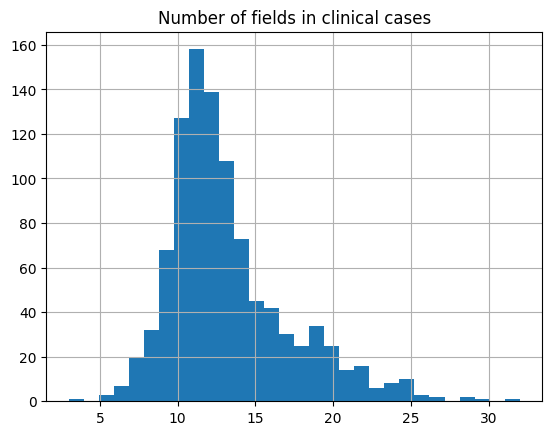

In [14]:
df["n_fields"].hist(bins=30)
plt.title("Number of fields in clinical cases")

In [15]:
df[df["n_fields"] >=50]

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields


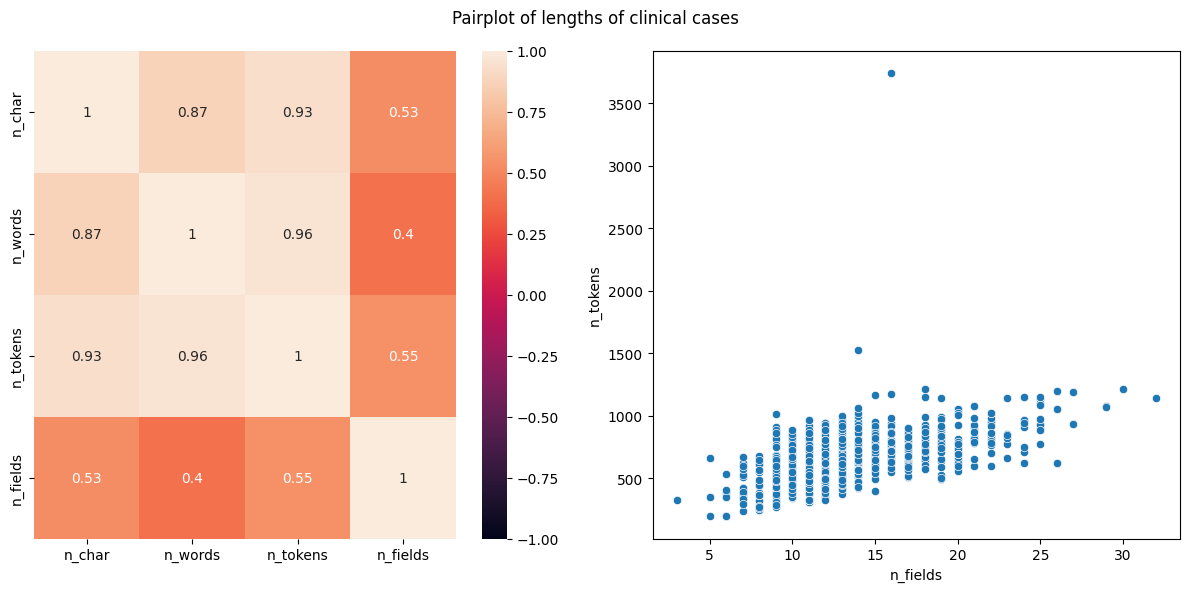

In [16]:
# Heatmap correlation matrix
import seaborn as sns
import numpy as np

cols = ["n_char", "n_words", "n_tokens", "n_fields"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.scatterplot(x="n_fields", y="n_tokens", data=df, ax=ax[1])

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [17]:
df["placeholders"] = df["text"].str.findall(r"\[(.+)\]")
df["n_placeholders"] = df["placeholders"].str.len()
df

,filename,text,text_orig,n_char,n_words,n_tokens,fields,n_fields,placeholders,n_placeholders
0,36951253_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 44-year-...,**Discharge Summary**\n\n**Patient:** 44-year-...,2337,301,559,"[Patient, Admission Date, Discharge Date, Reas...",11,"[Date of Admission, Date of Discharge, List Me...",5
1,33892935_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 66-year-...,**Discharge Summary**\n\n**Patient:** 66-year-...,2611,346,653,"[Patient, Medical Record Number, Date of Admis...",20,"[Insert MRN, Insert Date, Insert Date, List me...",8
2,28960930_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 15-year-...,**Discharge Summary**\n\n**Patient:** 15-year-...,3897,525,974,"[Patient, Admission Date, Discharge Date, Reas...",14,"[Date of Admission, Date of Discharge]",2
3,29538200_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 60-year-...,**Discharge Summary**\n\n**Patient:** 60-year-...,2394,330,643,"[Patient, Admission Date, Discharge Date, Reas...",19,"[Admission Date - To be added, Discharge Date...",5
4,30103814_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 86-year-...,**Discharge Summary**\n\n**Patient:** 86-year-...,3132,442,835,"[Patient, Admission Date, Discharge Date, Reas...",13,"[Date of Admission, Date of Discharge, List up...",3
...,...,...,...,...,...,...,...,...,...,...
995,30762762_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 30-year-...,**Discharge Summary**\n\n**Patient:** 30-year-...,2193,324,614,"[Patient, Admission Date, Discharge Date, Reas...",13,"[Date of Admission, Date of Discharge, List me...",4
996,27980283_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 76-year-...,**Discharge Summary**\n\n**Patient:** 76-year-...,2500,357,622,"[Patient, Admission Date, Discharge Date, Reas...",12,"[Date of second admission, Date of discharge, ...",5
997,34012203_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 77-year-...,**Discharge Summary**\n\n**Patient:** 77-year-...,2564,339,683,"[Patient, Admission Date, Discharge Date, Reas...",17,"[Date of Admission, Date of Discharge, List me...",5
998,37828735_4_transformed_step1.txt,**Discharge Summary**\n\n**Patient:** 49-year-...,**Discharge Summary**\n\n**Patient:** 49-year-...,1428,187,419,"[Patient, Admission Date, Discharge Date, Reas...",12,"[Date of Admission, Date of Discharge, Date of...",3


Text(0.5, 1.0, 'Number of placeholders in clinical cases')

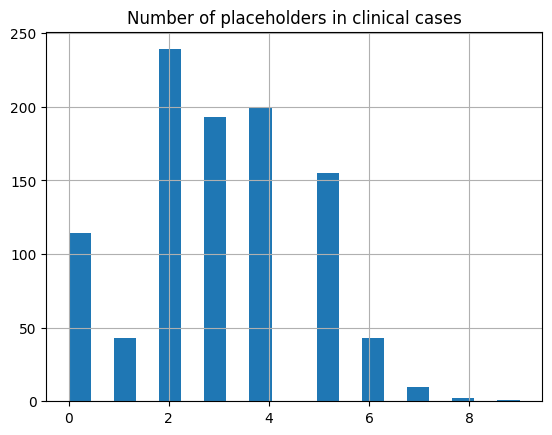

In [18]:
df["n_placeholders"].hist(bins=20)
plt.title("Number of placeholders in clinical cases")

In [19]:
df["cat_ph"] = df["n_placeholders"].apply(lambda x: "0" if x == 0 else "1-5" if x <= 5 else "6-10" if x <= 10 else ">10")

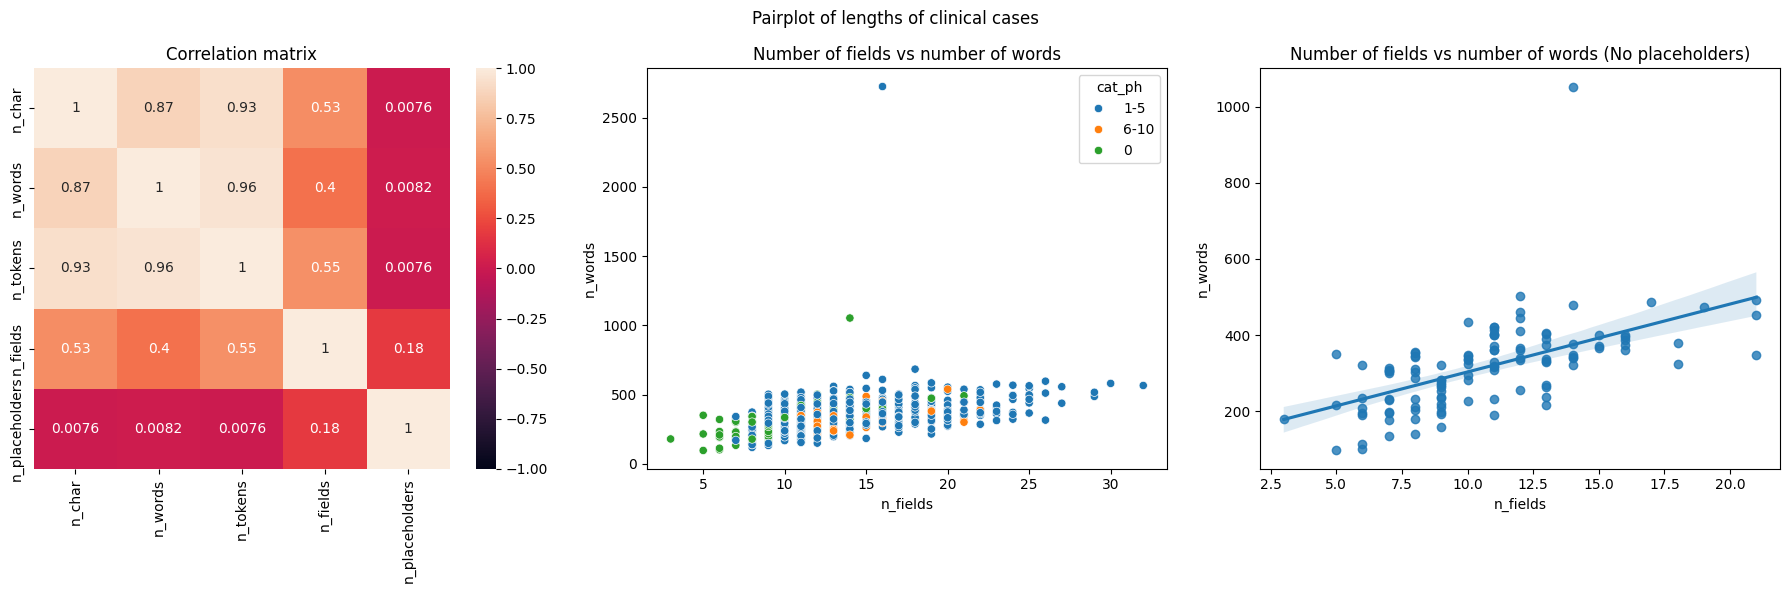

In [20]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_tokens", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_words", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of words")

sns.regplot(x="n_fields", y="n_words", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of words (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

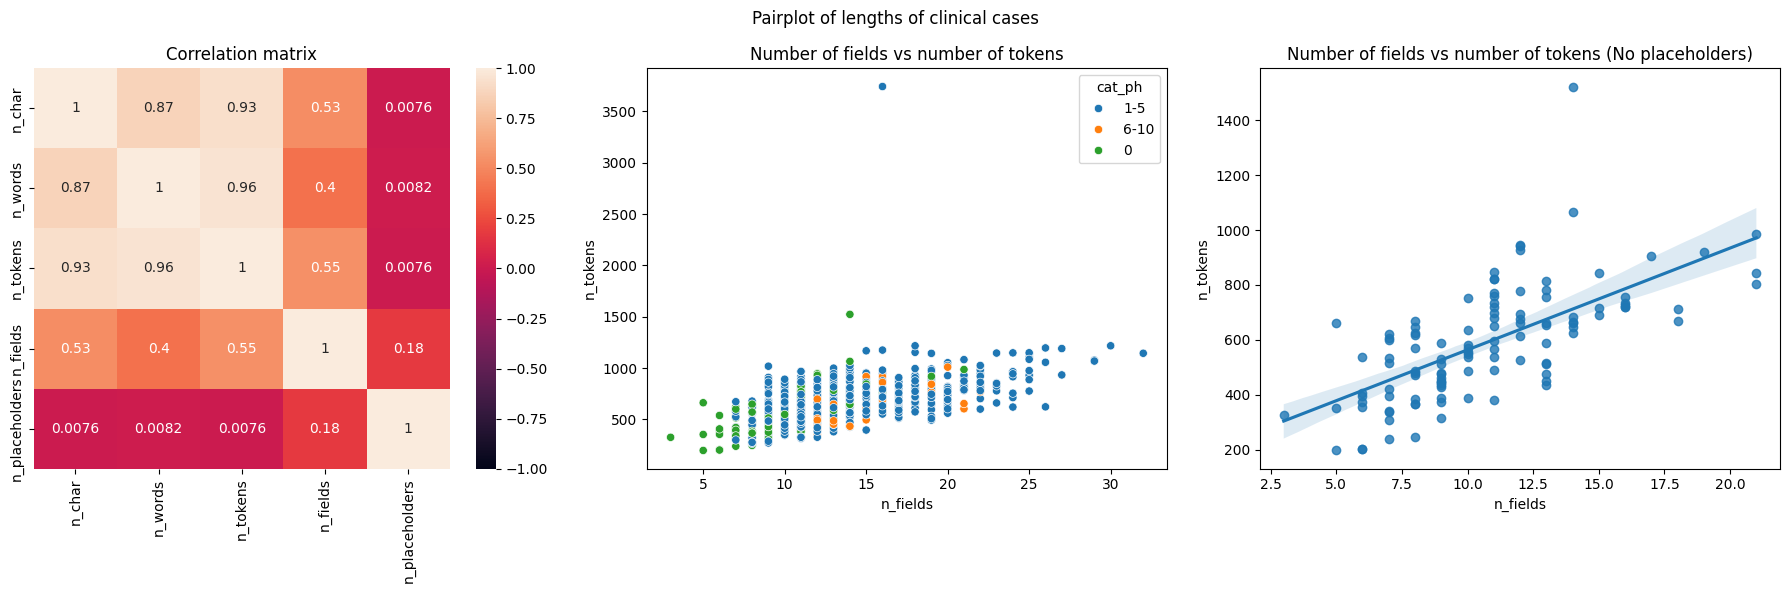

In [21]:
# Heatmap correlation matrix

cols = ["n_char", "n_words", "n_tokens", "n_fields", "n_placeholders"]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(df[cols].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
ax[0].set_title("Correlation matrix")

sns.scatterplot(x="n_fields", y="n_tokens", data=df, ax=ax[1], hue="cat_ph")
ax[1].set_title("Number of fields vs number of tokens")

sns.regplot(x="n_fields", y="n_tokens", data=df[df["n_placeholders"] == 0], ax=ax[2])
ax[2].set_title("Number of fields vs number of tokens (No placeholders)")

plt.suptitle("Pairplot of lengths of clinical cases")
plt.tight_layout()

In [22]:
df.describe()

,n_char,n_words,n_tokens,n_fields,n_placeholders
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2513.769000,345.369000,655.344000,13.101000,3.02800
std,657.103805,117.954797,201.801113,4.075464,1.70062
min,781.000000,97.000000,197.000000,3.000000,0.00000
25%,2085.750000,283.750000,530.750000,10.000000,2.00000
50%,2486.000000,342.000000,644.500000,12.000000,3.00000
75%,2897.250000,395.250000,763.250000,15.000000,4.00000
max,7119.000000,2724.000000,3743.000000,32.000000,9.00000
